In [2]:
# Supervised ML
# CLassification --> Logistic Regression

# Sigmoid Function
import numpy as np
from sklearn.linear_model import LogisticRegression

# Step 2: Create the dataset
X = np.array([[1],[2],[3],[4],[5],[6]]) # hours_studied
y = np.array([0,0,0,1,1,1]) # passed or not

# Step 3: Create and train the model
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [10]:
# predit_proba()
y_prob = model.predict_proba(X)[:,1] #[:,1] all rows but from column 1
y_prob

array([0.05723731, 0.15697456, 0.36349699, 0.63656293, 0.84305971,
       0.94277666])

In [3]:
# Get the slope and intercept
a = model.coef_[0][0] # slope  coef_ is a 2nd array in scikit-learn
b = model.intercept_[0] # intercept

print(f'a (slope): {a}')
print(f'b (intercept): {b}')

# a = 1.12 means the model thinks "hours_studied" strongly affects the chance of passing
# if we had a = 0.2 the effect would be much weaker

# b = -3.9 means a student who studies very few hours has a very low chance of passing.

a (slope): 1.1206952510393666
b (intercept): -3.9223038967769632


In [6]:
# Compute the score --> if a student studying for 3.5 hours
score = (1.1207)*(3.5)+(-3.9223)
print(score)

0.0001500000000000945


In [7]:
import math
res = math.e**0.00015
print(res)

1.0001500112505626


In [8]:
# Probability
# 1 / 1 + e**score

1/(1 + 1.00015)

0.49996250281228904

In [11]:
# Fourth Machine Learning Project
# Classification -- Logistic Regression

In [12]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
# Load the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# Missing value calculation
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [22]:
# Select independent and dependent variable
x = data.drop('Outcome',axis=1) # axis = 1 means column
y = data['Outcome']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
# predict_proba() stands for predict probabilities
# predict_proba() returns 2 columns for the negative and positive class
# get the predicted probabilities of the positive lable only
y_prob = model.predict_proba(x_test)[:, 1]
y_prob

array([0.27586937, 0.18844451, 0.11448595, 0.16354505, 0.47152939,
       0.44181446, 0.01545924, 0.66076486, 0.54146477, 0.77733165,
       0.25592258, 0.89734635, 0.33619447, 0.30303547, 0.08198166,
       0.38092542, 0.13935598, 0.07479571, 0.86673563, 0.56142846,
       0.20841168, 0.0773958 , 0.53963648, 0.0945842 , 0.53950071,
       0.88555077, 0.12431502, 0.0301631 , 0.25153143, 0.11581405,
       0.91113294, 0.87075892, 0.76536187, 0.83752571, 0.6166872 ,
       0.68329371, 0.96813392, 0.24364507, 0.51148073, 0.7361234 ,
       0.06983452, 0.5941234 , 0.5836747 , 0.32718338, 0.02759146,
       0.50239607, 0.63935335, 0.22534159, 0.36056287, 0.95629568,
       0.04889648, 0.66096815, 0.81167757, 0.24552808, 0.09325658,
       0.04152118, 0.77816586, 0.00570364, 0.40862107, 0.75695949,
       0.74135622, 0.35194624, 0.19236508, 0.20491469, 0.07688285,
       0.6271792 , 0.05091626, 0.73286238, 0.03691994, 0.71592735,
       0.67523499, 0.07016622, 0.18114967, 0.11430451, 0.09115

In [31]:
# get the predicted values
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [36]:
evl1 = pd.DataFrame({'Probabilites':y_prob, 'Predicted_Values':y_pred})
evl1.head(50)

,Probabilites,Predicted_Values
0,0.275869,0
1,0.188445,0
2,0.114486,0
3,0.163545,0
4,0.471529,0
5,0.441814,0
6,0.015459,0
7,0.660765,1
8,0.541465,1
9,0.777332,1


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
cm

#                         Actual_Positive    Actual_Negative
#   Predicted_Positive          78 (TP)           21 (FP)
#   Predicted_Negative          18 (FN)           37 (TN)

#                                            Total No. of Observations = 154   115 Correct  39 Wrong
 

array([[78, 21],
       [18, 37]])

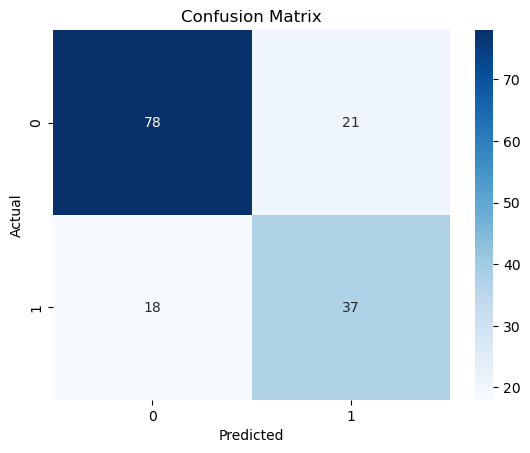

In [40]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')  # fmt --> d means display decimal / int value
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
print('Classification Report\n')
print(classification_report(y_test,y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

